#### About
Image gradients and Edge Detection using OpenCV.
* Popular algorithms for finding image gradients include Laplacian Derivatives, SobelX and SobelY.
> Laplacian Derivative
1. It is second derivative of the image signal.
2. At edges, Zeros are observed(Zero Crossing) in this as per image attached below
![cat](Laplacian.png) i.e wherever there is a zero crossing, there shall be an edge.
3. It is pronounced by Del Square and has the following formula

![laplacian_formula](formula1.png)

4. Laplacian doesn't provide direction of image.
5. We take a 3*3 patch to find laplacian of the center pixel which is denoted by following Finite difference approximation
![laplacian_formula2](formula2.png)

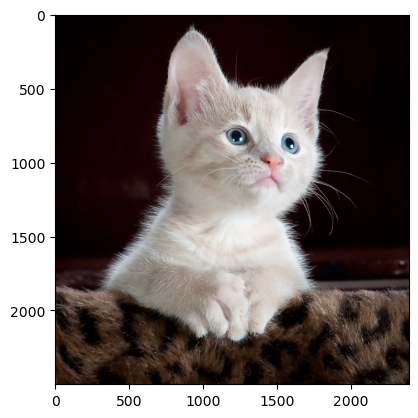

In [7]:
#importing modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#reading image
img = cv2.imread('cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

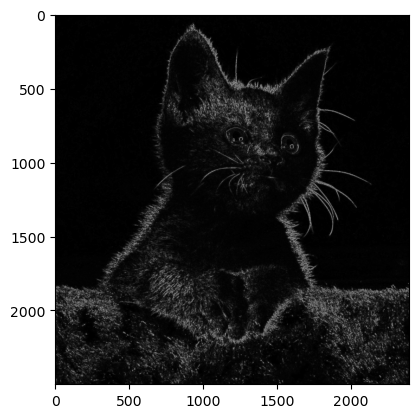

In [18]:
#using 64F datatype to handle negative values generated by lap
lap_image = cv2.Laplacian(gray,cv2.CV_64F,ksize=3) #always pass ksize = odd
lap_image = np.uint8(np.absolute(lap_image))
plt.imshow(lap_image,cmap='gray')
plt.show()

#### Sobel 
1. It comes in two variants SobelX and SobelY.
2. It is a combination of gaussian smoothing along with differentiation operation hence it's more resistant to noise
3. Sobel X focusses on vertical lines whereas SobelY focusses on horizontal lines.
4. If param is x =1,y=0 then SobelX and x=0,y=1 then sobelY


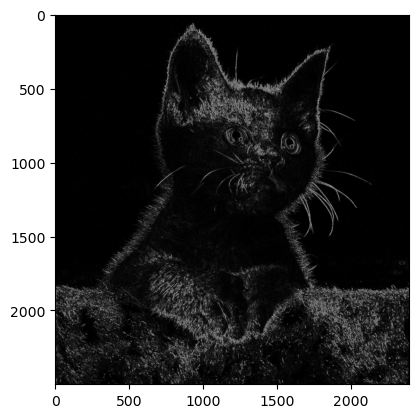

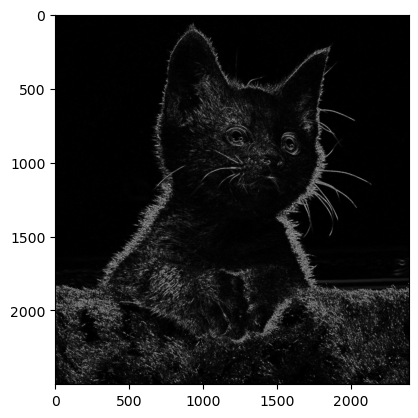

In [21]:
sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0, ksize=3)
sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1, ksize=3)
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))

plt.imshow(sobel_x,cmap='gray')
plt.show()
plt.imshow(sobel_y,cmap='gray')
plt.show()

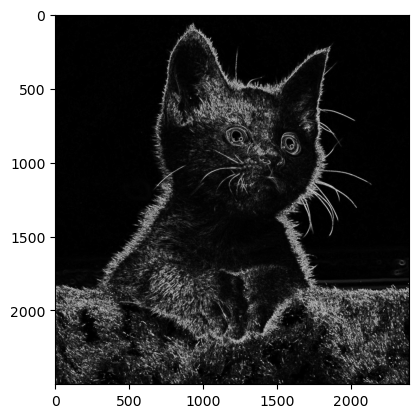

In [23]:
#let's combine both
combined_img = cv2.bitwise_or(sobel_x,sobel_y)
combined_img = np.uint8(np.absolute(combined_img))

plt.imshow(combined_img,cmap='gray')
plt.show()

#### Canny edge detector
1. It is an edge detection operator that uses a multi-stage alorithm to detect a wide range of edges in images.
2. The algorithm is comprised of 5 steps
* a. Noise Reduction
* b. Gradient Calculation
* c. Non Maximum suppression
* d. Double threshold
* e. Edge Tracking by Hysteresis


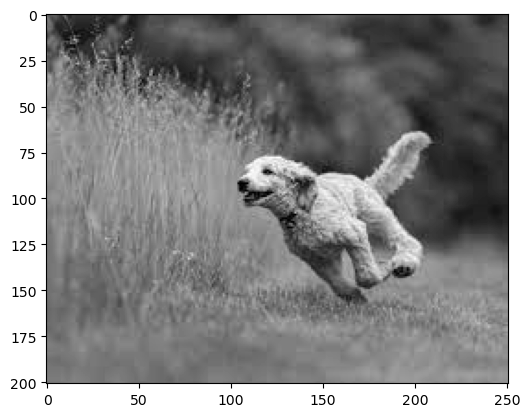

In [27]:
img = cv2.imread('dog.jpeg',0)
plt.imshow(img,cmap='gray')
plt.show()

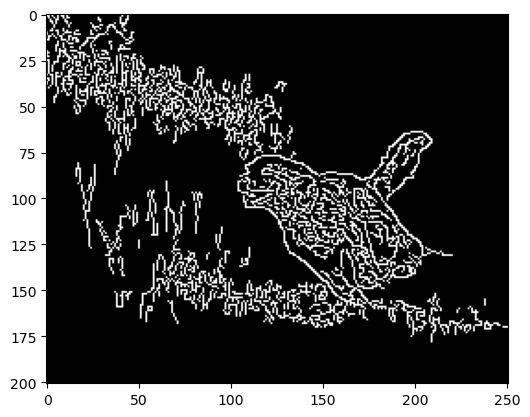

In [29]:
#calling the canny method with 2 thresholds for hysteresis
out = cv2.Canny(img,threshold1=78,threshold2=178) #we can add a trackbar too to change the value of threshold
plt.imshow(out,cmap='gray')
plt.show()